In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import wilcoxon
from sklearn.metrics import r2_score, mean_absolute_error, mean_absolute_percentage_error
from mlscorecheck.auc import (
    auc_onmin_grad,
    auc_rmin_grad,
    auc_max_grad,
    auc_maxa_grad,
    macc_min_grad,
    acc_rmax_grad,
    auc_rmin,
    auc_maxa,
    auc_max,
    auc_onmin,
    auc_max_profile,
    auc_rmin_profile
)

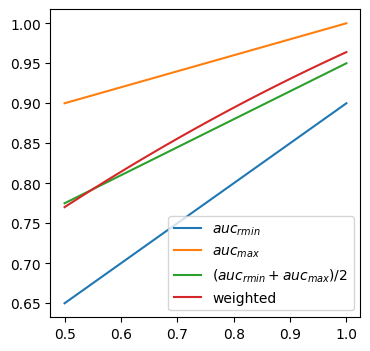

In [13]:
#fprs = 1 - np.linspace(0.5, 1.0, 100)
fprs = np.repeat(0.2, 100)
tprs = np.linspace(0.5, 1.0, 100)

mask = tprs >= fprs
fprs = fprs[mask]
tprs = tprs[mask]

p=100
n=100

auc_rmin_ = np.array([auc_onmin(fpr, tpr) for fpr, tpr in zip(fprs, tprs)])
auc_max_ = np.array([auc_max(fpr, tpr) for fpr, tpr in zip(fprs, tprs)])
auc_rmin_grad_ = np.array([auc_rmin_grad(fpr, tpr) for fpr, tpr in zip(fprs, tprs)])
auc_max_grad_ = np.array([auc_max_grad(fpr, tpr) for fpr, tpr in zip(fprs, tprs)])

auc_rmin_grad_ += 1
auc_max_grad_ += 1

weight_upper = auc_rmin_grad_ / (auc_rmin_grad_ + auc_max_grad_)
weight_lower = auc_max_grad_ / (auc_rmin_grad_ + auc_max_grad_)

plt.figure(figsize=(4, 4))
plt.plot(tprs, auc_rmin_, label=r'$auc_{rmin}$')
plt.plot(tprs, auc_max_, label=r'$auc_{max}$')
plt.plot(tprs, (auc_rmin_ + auc_max_) / 2.0, label=r'$(auc_{rmin} + auc_{max})/2$')
plt.plot(tprs, (weight_lower * auc_rmin_ + weight_upper * auc_max_), label=r'weighted')
plt.legend()

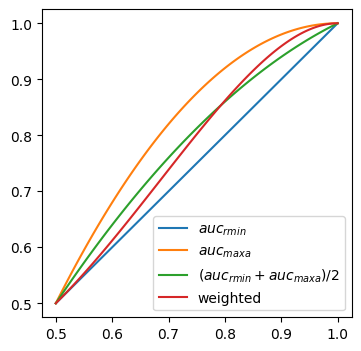

In [9]:
fprs = 1 - np.linspace(0.5, 1.0, 100)
tprs = np.linspace(0.5, 1.0, 100)

mask = tprs >= fprs
fprs = fprs[mask]
tprs = tprs[mask]

p=100
n=100

auc_rmin_ = np.array([auc_onmin(fpr, tpr) for fpr, tpr in zip(fprs, tprs)])
auc_maxa_ = np.array([auc_maxa((p*tpr + n*(1 - fpr))/(p + n), p, n) for fpr, tpr in zip(fprs, tprs)])
auc_rmin_grad_ = np.array([auc_rmin_grad(fpr, tpr) for fpr, tpr in zip(fprs, tprs)])
auc_maxa_grad_ = np.array([auc_maxa_grad((p*tpr + n*(1 - fpr))/(p + n), p, n) for fpr, tpr in zip(fprs, tprs)])

weight_upper = auc_rmin_grad_ / (auc_rmin_grad_ + auc_maxa_grad_)
weight_lower = auc_maxa_grad_ / (auc_rmin_grad_ + auc_maxa_grad_)

plt.figure(figsize=(4, 4))
plt.plot(tprs, auc_rmin_, label=r'$auc_{rmin}$')
plt.plot(tprs, auc_maxa_, label=r'$auc_{maxa}$')
plt.plot(tprs, (auc_rmin_ + auc_maxa_) / 2.0, label=r'$(auc_{rmin} + auc_{maxa})/2$')
plt.plot(tprs, (weight_lower * auc_rmin_ + weight_upper * auc_maxa_), label=r'weighted')
plt.legend()

In [10]:
fprs, tprs

(array([0.5       , 0.49494949, 0.48989899, 0.48484848, 0.47979798,
        0.47474747, 0.46969697, 0.46464646, 0.45959596, 0.45454545,
        0.44949495, 0.44444444, 0.43939394, 0.43434343, 0.42929293,
        0.42424242, 0.41919192, 0.41414141, 0.40909091, 0.4040404 ,
        0.3989899 , 0.39393939, 0.38888889, 0.38383838, 0.37878788,
        0.37373737, 0.36868687, 0.36363636, 0.35858586, 0.35353535,
        0.34848485, 0.34343434, 0.33838384, 0.33333333, 0.32828283,
        0.32323232, 0.31818182, 0.31313131, 0.30808081, 0.3030303 ,
        0.2979798 , 0.29292929, 0.28787879, 0.28282828, 0.27777778,
        0.27272727, 0.26767677, 0.26262626, 0.25757576, 0.25252525,
        0.24747475, 0.24242424, 0.23737374, 0.23232323, 0.22727273,
        0.22222222, 0.21717172, 0.21212121, 0.20707071, 0.2020202 ,
        0.1969697 , 0.19191919, 0.18686869, 0.18181818, 0.17676768,
        0.17171717, 0.16666667, 0.16161616, 0.15656566, 0.15151515,
        0.14646465, 0.14141414, 0.13636364, 0.13

In [11]:

auc_max_grad_ = np.array([auc_max_grad(fpr, tpr) for fpr, tpr in zip(fprs, tprs)])
auc_rmin_grad_ = np.array([auc_rmin_grad(fpr, tpr) for fpr, tpr in zip(fprs, tprs)])
auc_maxa_grad_ = np.array([auc_maxa_grad((p*tpr + n*(1 - fpr))/(p + n), p, n) for fpr, tpr in zip(fprs, tprs)])/(n/p)

acc_rmax_grad_ = np.array([acc_rmax_grad(auc_, p, n) for auc_ in tprs])
macc_min_grad_ = np.array([macc_min_grad(auc_, p, n) for auc_ in tprs])


/home/gykovacs/workspaces/mlscorecheck/mlscorecheck/auc/_acc_single.py:129: RuntimeWarning: divide by zero encountered in scalar divide
  return np.sqrt(2) * min(p, n) / 2 / (np.sqrt(auc - 0.5) * (p + n))
/home/gykovacs/workspaces/mlscorecheck/mlscorecheck/auc/_acc_single.py:200: RuntimeWarning: divide by zero encountered in scalar divide
  return n * p / ((n + p) * np.sqrt(-2 * auc * n * p + 2 * n * p))


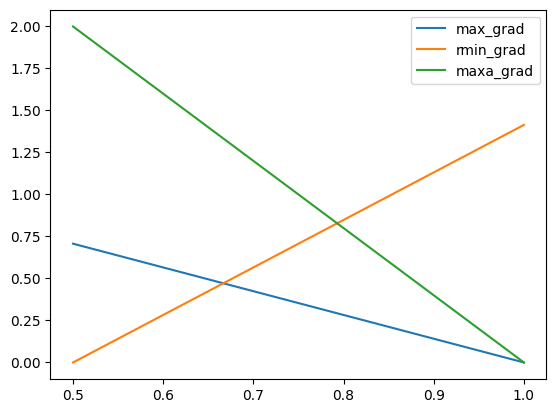

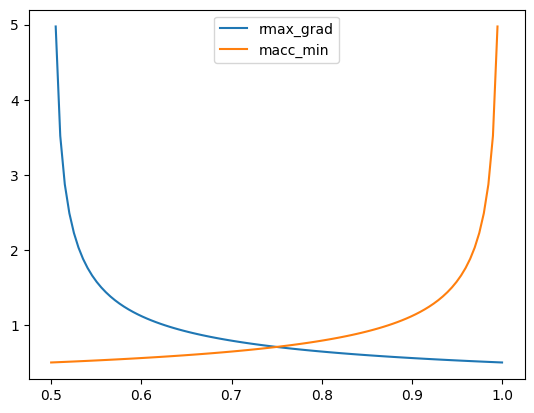

In [12]:
plt.plot(tprs, auc_max_grad_, label='max_grad')
plt.plot(tprs, auc_rmin_grad_, label='rmin_grad')
plt.plot(tprs, auc_maxa_grad_, label='maxa_grad')
plt.legend()

plt.figure()

plt.plot(tprs, acc_rmax_grad_, label='rmax_grad')
plt.plot(tprs, macc_min_grad_, label='macc_min')
plt.legend()